# Practical 1: IOT and National Accounts
In this exercise, you will practice how to apply the three methods to calculate national GDP, using different databases and years.  
While the exercise is quantitive, try to reason about differences and implications of the methods as well as results from the method application.

### Learning goals

- Analysing GDP trends
- Implementing GDP calculation methods in different contexts
- Understanding the data structure difference between SNA and IO tables 
- Understanding the implications of quantitative results

### Instructions

Data should be downloaded into a data/ folder in the same directory your module is, then it should be loaded and plotted in python

- Data source 1: eurostat, national accounts, main GDP aggregates https://ec.europa.eu/eurostat/data/database?node_code=lfsq

- Data source 2: CBS https://www.cbs.nl/en-gb/custom/2020/29/supply-and-use-input-output-and-sector-accounts

For EU-27 and The Netherlands, respectively, obtain, plot, and analyze the GDP time series for all years available starting from the year 2000 (annual)

#### Exercise 1
Using the EUROSTAT data plot a graph showing the yearly GDP change since 2011

- expenditure perspective (GDP = Consumption + Investment + Government Spending + Net Export)
- production perspective (GDP =  sum of all value added of all production activities)
- income perspective (GDP = Total National Income + Sales Taxes + Depreciation + Net Foreign Factor Income)

Use the metadata accompanying the data to help you understand all data available within the CSV file https://ec.europa.eu/eurostat/cache/metadata/en/nama10_esms.htm

Tip: if you download csv.gz data this is CSV data that has been compressed. You can import it directly into python by using the "compression" argument in pd.read_csv     

In [78]:
# import modules
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')

base_path = "data/eurostat/"

print(os.getcwd())

# Import data
# replace None with the rest of the function to load the data 
GDP_data = pd.read_csv(f"{base_path}nama_10_gdp_linear.csv.gz", compression="gzip")

# We are only interested in data in euros so make sure you slice the right currency
GDP_data = GDP_data[GDP_data.unit == "CP_MEUR"] 

# print the columns, it will help you understand how you can proceed in selecting the data
print(GDP_data.columns)
# print all unique values in the National Account Item column (na_item) to use as a reference
print(GDP_data.na_item.unique())

c:\Users\fdona\OneDrive - Universiteit Leiden\1_CML\6_Teaching\EEIO\advanced_EEIO_course_notebooks\IOT_n_National_accounts
Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'na_item', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')
['B11' 'B111' 'B112' 'B1G' 'B1GQ' 'B2A3G' 'D1' 'D11' 'D12' 'D2' 'D21'
 'D21X31' 'D2X3' 'D3' 'D31' 'P3' 'P31_S13' 'P31_S14' 'P31_S14_S15'
 'P31_S15' 'P32_S13' 'P3_P5' 'P3_P6' 'P3_S13' 'P41' 'P51G' 'P52' 'P52_P53'
 'P53' 'P5G' 'P6' 'P61' 'P62' 'P7' 'P71' 'P72' 'YA0' 'YA1' 'YA2']


In [86]:
# Production approach
# Isolate all data for the production approach

# total_gross_value_added = "B1G"
# taxes_on_products = "D21"
# subsidies = "D31"

breakdown_prod = ["B1G", "D21", "D31"]

# Expenditure approach
# Isolate all data for the expenditure approach

# final_consumption = "P3"
# gross_fixed_capital_form = "P51"
# changes_in_inventories = "P52"
# acquisition_less_disposal_of_val = "P53"
# exports = "P6"
# imports = "P7"

breakdown_expen = ["P3", "P51", "P52", "P53", "P6", "P7"]

# Income approach
# Isolate all data for the income approach

# comp_employees = "D1"
# gross_operating_surplus = "B2G"
# mixed_income = "B3G"
# taxes_less_subsidies = "D2"
# imports = "D3"

breakdown_income = ["D1", "B2G", "B3G", "D2", "D3"]

for bi in breakdown_items:
    if bi not in GDP_data.na_item.unique():
        print(bi)



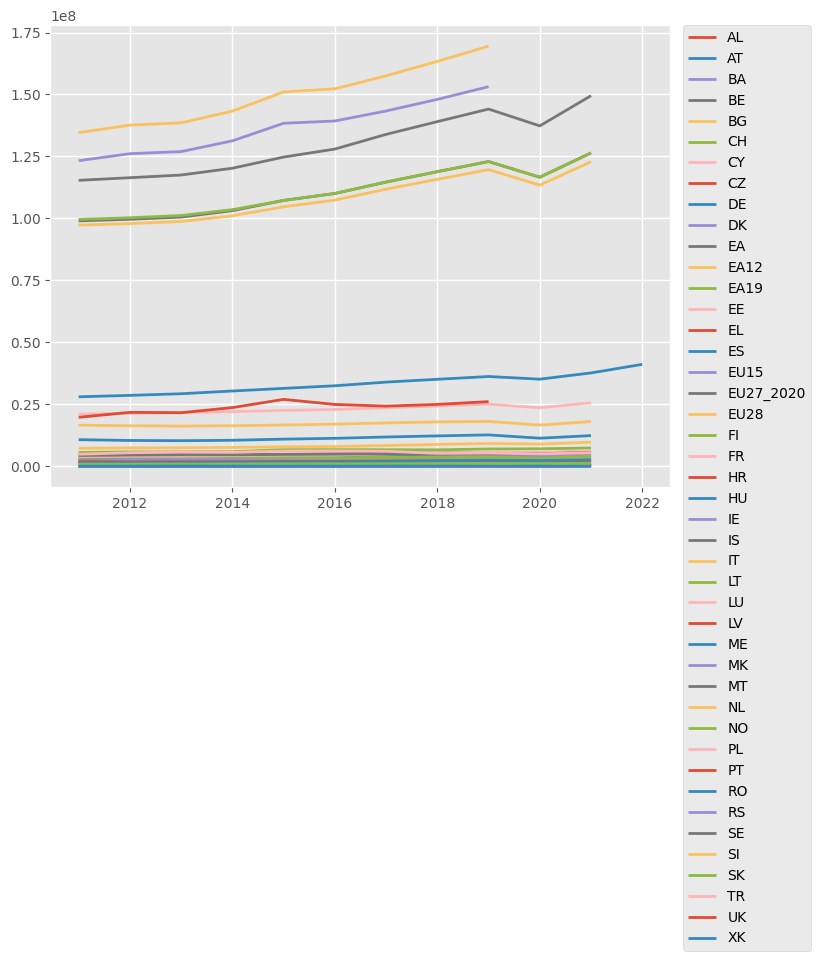

{'AL': {2011: 84942.7, 2012: 86952.3, 2013: 88347.39999999998, 2014: 91038.70000000001, 2015: 93351.8, 2016: 98048.59999999999, 2017: 106123.9, 2018: 116909.9, 2019: 125628.00000000003, 2020: 118608.40000000001, 2021: 137248.5}, 'AT': {2011: 3323026.7, 2012: 3416115.0, 2013: 3467978.8000000003, 2014: 3559561.2, 2015: 3666840.9, 2016: 3798570.2, 2017: 3947332.9, 2018: 4131547.7, 2019: 4252986.199999999, 2020: 4055000.0000000005, 2021: 4397929.4}, 'BA': {2011: 147363.4, 2012: 148867.5, 2013: 151130.90000000002, 2014: 154191.2, 2015: 159766.3, 2016: 166144.40000000002, 2017: 156579.8, 2018: 165779.5, 2019: 172867.80000000002, 2020: 164201.59999999998, 2021: 178180.0}, 'BE': {2011: 4390710.899999999, 2012: 4509769.199999999, 2013: 4572629.4, 2014: 4686661.699999999, 2015: 4803266.0, 2016: 4978002.1, 2017: 5203666.300000001, 2018: 5397323.100000001, 2019: 5584660.3999999985, 2020: 5312870.5, 2021: 5913895.4}, 'BG': {2011: 452531.89999999997, 2012: 469506.0, 2013: 470362.5, 2014: 482482.1, 2

In [82]:

GDP_breakdown = GDP_data[GDP_data.na_item.isin(breakdown_items)]
plt.figure(figsize=(8,6))

country_GDP_series = {}
for country in GDP_breakdown.geo.unique(): 
    country_data = GDP_data[GDP_data.geo==country]

    country_data = country_data[country_data.TIME_PERIOD >= 2011]
    yearly_GDP = {}
    for year in country_data.TIME_PERIOD.unique():
        year_data = country_data[country_data.TIME_PERIOD==year]
        all_min_impo = year_data[year_data.na_item != "P7"].OBS_VALUE.sum()
        try:
            imports = year_data[year_data.na_item == "P7"].OBS_VALUE.item()
            yearly_GDP[year] = all_min_impo - imports
        except Exception:
            print(year_data[year_data.na_item == "P7"].OBS_VALUE)
        
    plt.plot(yearly_GDP.keys(), yearly_GDP.values(), label=country)
    country_GDP_series[country] = yearly_GDP
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

print(country_GDP_series)



In [12]:
# Plot the year on year absolute GDP change

years = None
yearly_GDP_totals = []

plt.plot(years, yearly_GDP_totals)  # Plot the chart
plt.show()  # display

In [13]:
#

#### Exercise 2

Calculate for the latest year available the GDP total and its composition using the three approaches for CBS IO data

Tip: once you download the data have a good look at how it is structure, how the labels are organized.


In [4]:
# Load the IOT

cbs_use_table = pd.ExcelFile("IOT_n_national_accounts/data/CBS/Use tables 2015-2019.xlsx", engine="openpyxl")


current_year = {}


In [5]:
# Production perspective




In [8]:
# Income perspective



